excersice 1

In [3]:
import numpy as np

In [ ]:
class Perceptron:
    def __init__(self, N, alpha=0.1):
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.alpha = alpha

    def step(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs=10):
        X = np.c_[np.ones((X.shape[0])), X]

        for epoch in np.arange(0, epochs):
            for x, target in zip(X, y):
                p = self.step(np.dot(x, self.W))
                if p != target:
                    error = p - target
                    self.W += -self.alpha * error * x

    def predict(self, X, add_bias=True):
        X = np.atleast_2d(X)
        if add_bias:
            X = np.c_[np.ones((X.shape[0])), X]

        return self.step(np.dot(X, self.W))

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y = np.array([[0], [0], [0], [1]])

In [ ]:
X.shape[0], X.shape[1]

In [ ]:
model = Perceptron(X.shape[1], alpha=0.1)
model

In [ ]:
model.fit(X, y, epochs=10)

In [ ]:
for x, target in zip(X, y):
    predict = model.predict(x)
    print(f"X={x} , label={target[0]}, prediction={predict}")

In [ ]:
model.W
w0, w1, w2 = model.W
x2_hat = -1 * (X[:, 0] * w1 + w0) / w2
y.flatten()

In [ ]:
import matplotlib.pyplot as plt

colors = ["blue", "red"]
y_colors = [colors[i] for i in y.flatten()]
plt.scatter(X[:, 0], X[:, 1], color=y_colors)
plt.plot(X[:, 0], x2_hat)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
prefix_url = "https://graphemy.ir/datasets"


def get_file(name):
    file_name = name if ".csv" in name else f"{name}.csv"
    return f"{prefix_url}/{file_name}"

In [3]:
df = pd.read_csv(get_file("heart_failure_clinical_records_dataset"))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
X = df.drop("DEATH_EVENT", axis=1).to_numpy()
y = df["DEATH_EVENT"].to_numpy()

X.shape, y.shape

((299, 12), (299,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
mlp = MLPClassifier()

In [7]:
pipe = Pipeline([("scaler", StandardScaler()), ("cls", MLPClassifier())])

In [8]:
params = [
    {
        "cls__hidden_layer_sizes": [(50,), (100,)],
        "cls__activation": ["relu"],
        "cls__alpha": [0.0001, 0.001],
    }
]

In [9]:
clf = GridSearchCV(pipe, param_grid=params, cv=5)

In [10]:
clf.fit(X_train, y_train)

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('cls', MLPClassifier())]),
             param_grid=[{'cls__activation': ['relu'],
                          'cls__alpha': [0.0001, 0.001],
                          'cls__hidden_layer_sizes': [(50,), (100,)]}])

In [11]:
clf.best_params_

{'cls__activation': 'relu',
 'cls__alpha': 0.0001,
 'cls__hidden_layer_sizes': (100,)}

In [12]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('cls', MLPClassifier())])

In [13]:
prediction = clf.predict(X_test)

In [14]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60



LogisticRegression

In [15]:
lr = LogisticRegression()

In [16]:
pipe = Pipeline([("scaler", StandardScaler()), ("cls", lr)])

In [17]:
params = [{"cls__penalty": ["l2"], "cls__C": [1.0, 10.0], "cls__solver": ["lbfgs"]}]

In [18]:
clf = GridSearchCV(pipe, param_grid=params, cv=5)

In [19]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('cls', LogisticRegression())]),
             param_grid=[{'cls__C': [1.0, 10.0], 'cls__penalty': ['l2'],
                          'cls__solver': ['lbfgs']}])

In [20]:
clf.best_params_

{'cls__C': 1.0, 'cls__penalty': 'l2', 'cls__solver': 'lbfgs'}

In [21]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('cls', LogisticRegression())])

In [22]:
prediction = clf.predict(X_test)

In [23]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.84      0.84      0.84        19

    accuracy                           0.90        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60



DecisionTRee

In [24]:
dt = DecisionTreeClassifier()

In [25]:
pipe = Pipeline([("cls", dt)])

In [26]:
params = {
    "cls__criterion": ["gini", "entropy"],
    "cls__max_depth": [3, 5, None],
    "cls__min_samples_split": [2, 4, 8],
}

In [27]:
clf = GridSearchCV(pipe, param_grid=params, cv=5)

In [28]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cls', DecisionTreeClassifier())]),
             param_grid={'cls__criterion': ['gini', 'entropy'],
                         'cls__max_depth': [3, 5, None],
                         'cls__min_samples_split': [2, 4, 8]})

In [29]:
clf.best_params_

{'cls__criterion': 'gini', 'cls__max_depth': 5, 'cls__min_samples_split': 2}

In [30]:
clf.best_estimator_

Pipeline(steps=[('cls', DecisionTreeClassifier(max_depth=5))])

In [31]:
prediction = clf.predict(X_test)

In [32]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60



Tanh

In [1]:
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return np.tanh(x)


def tanh_deriv(x):
    return 1 - np.tanh(x) ** 2

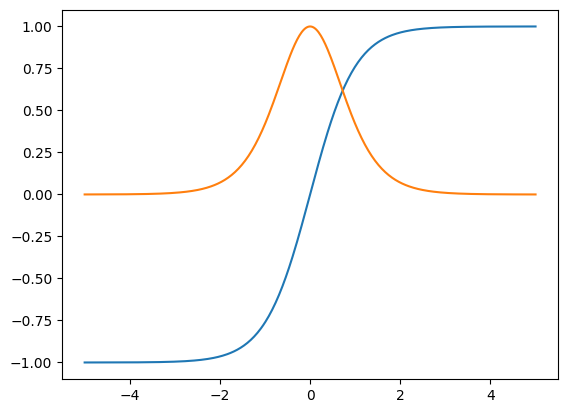

In [4]:
x = np.linspace(-5, 5, 400)
y = tanh(x)
dy = tanh_deriv(x)
plt.plot(x, y)
plt.plot(x, dy)

این تابع صفر مرکز است، کران دار است، غیرخطی ست، پیوسته و مشتق پذیر است.گرادیان در مرکز است که باعث یادگیری خوب اطراف صفر می شود. پدیده محو گرادیان در مقادیر بزرگ اتفاق میفتد.